In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import sys
sys.path.append('/home/iain/Desktop/IEL')
from DataGeneratorPredictors import calculateWaterAndLevelDifference

# Daily Generated Data

In [2]:
# Read in the Daily_Generated_Data.csv file
daily = pd.read_csv('/home/iain/Desktop/IEL/Data/Generated Data/Daily Generated Data.csv')
daily = calculateWaterAndLevelDifference(dataframe=daily, daily=True)
daily.describe()

,Precipitation,Flow Rate,Water Level,Water Difference,Level Difference
count,99.000000,99.000000,99.000000,9.900000e+01,99.000000
mean,4.717172,3.655000,0.527545,-1.143452e+05,-0.002818
std,6.877292,3.735129,0.237703,3.277748e+05,0.164367
min,0.000000,0.022000,0.179000,-1.308497e+06,-0.375000
25%,0.200000,0.586000,0.295000,-3.178188e+05,-0.073000
50%,1.400000,2.728000,0.521000,-8.869860e+04,0.000000
75%,7.000000,5.206500,0.680500,3.199140e+04,0.069500
max,34.000000,19.646000,1.246000,1.086925e+06,0.817000


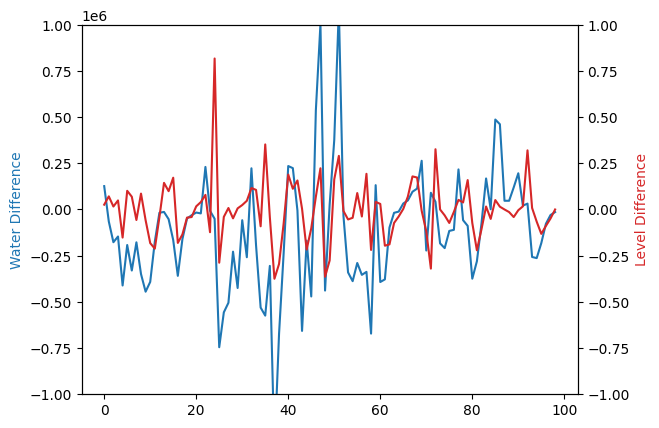

In [3]:
# Plot the water difference and the level derivative against the date with different axis scales
fig, ax1 = plt.subplots()
ax1.plot(daily['Water Difference'].iloc[0:2000])
ax1.set_ylabel('Water Difference', color='tab:blue')
ax1.set_ylim(-1000000, 1000000)
ax2 = ax1.twinx()
ax2.plot(daily['Level Difference'].iloc[0:2000], color='tab:red')
ax2.set_ylabel('Level Difference', color='tab:red')
ax2.set_ylim(-1, 1)
plt.show()

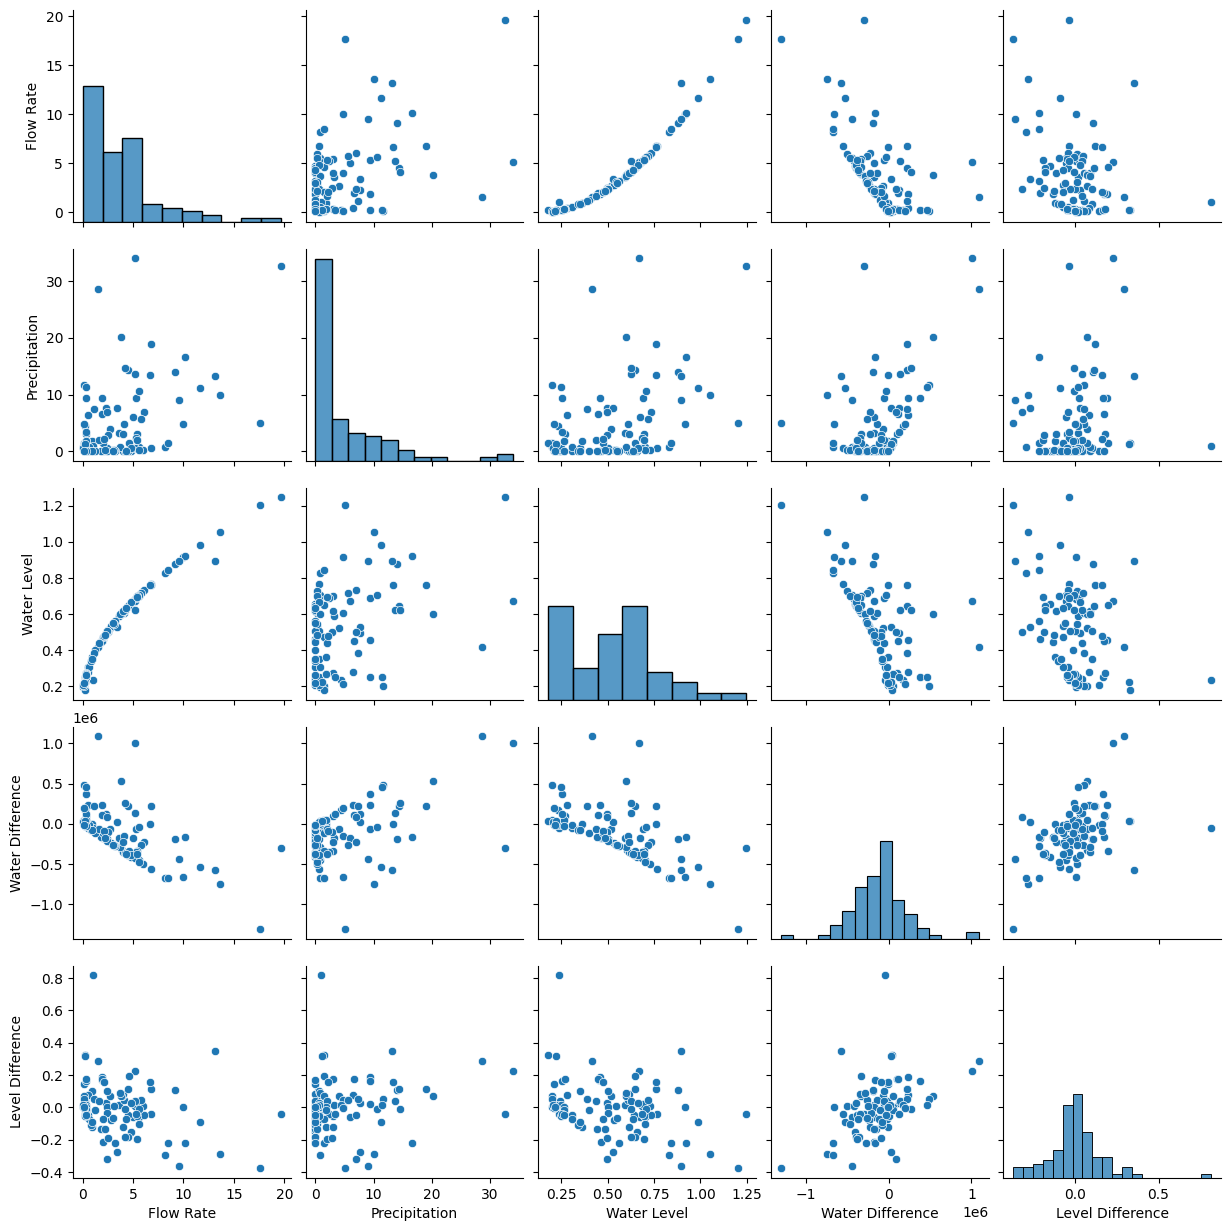

In [4]:
cols = ['Flow Rate', 'Precipitation', 'Water Level', 'Water Difference', 'Level Difference']
sns.pairplot(daily[cols], height=2.5)

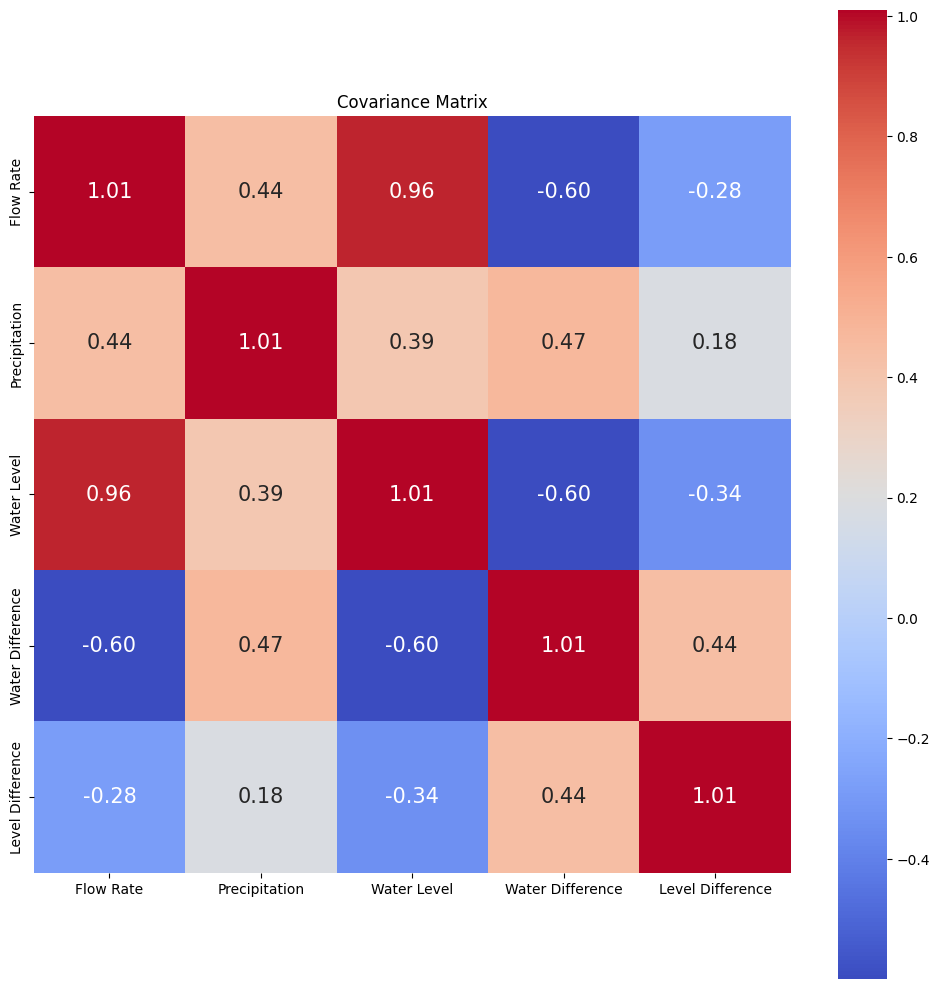

In [5]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(daily[cols].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm', yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

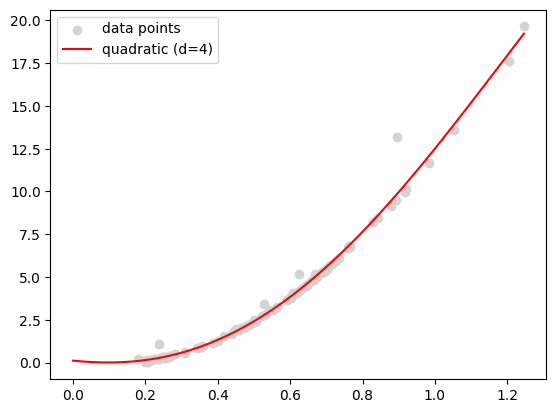

In [6]:
# Fit a polynomial curve to the data
X = daily['Water Level'].values.reshape(-1, 1)
y = daily['Flow Rate'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='o')

x = np.linspace(0, max(X), 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='quadratic (d=4)', color='red')

plt.legend(loc='upper left')
plt.show()

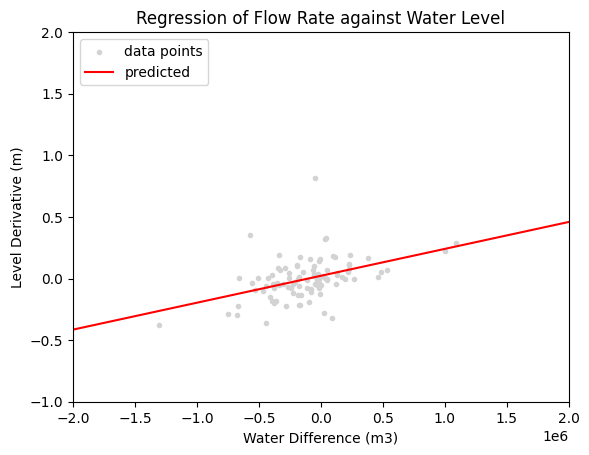

In [7]:
# Remove days with water difference > 2000000 and > 2000000
typical = daily[daily['Water Difference'] < 2000000]
typical = typical[typical['Water Difference'] > -2000000]

# Fit a polynomial curve of Water difference (independent) and level derivative (dependent)
X = typical['Water Difference'].values.reshape(-1, 1)
y = typical['Level Difference'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=1)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='.')

x = np.linspace(-2000000, 2000000, 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='predicted', color='red')

plt.xlim(-2000000, 2000000)
plt.ylim(-1, 2)

plt.legend(loc='upper left')
plt.title('Regression of Flow Rate against Water Level')
plt.xlabel('Water Difference (m3)')
plt.ylabel('Level Derivative (m)')
plt.show()

# Quarter-Hourly Generated Data

In [8]:
# Read in the Quarter_Hourly_Generated_Data.csv file
quarter_hourly = pd.read_csv('/home/iain/Desktop/IEL/Data/Generated Data/Quarter Hourly Generated Data.csv')
quarter_hourly = calculateWaterAndLevelDifference(dataframe = quarter_hourly, daily=False)
quarter_hourly.describe()

,Precipitation,Flow Rate,Water Level,Water Difference,Level Difference
count,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000
mean,0.049137,3.655025,0.527559,-1191.117898,-0.000032
std,0.180862,4.199698,0.255887,8065.856797,0.014437
min,0.000000,0.000000,0.100000,-36500.400000,-0.158000
25%,0.000000,0.459750,0.290000,-4095.225000,-0.002000
50%,0.000000,2.695500,0.526000,-1880.550000,0.000000
75%,0.000000,5.208000,0.686000,-225.000000,0.000000
max,3.600000,42.439000,1.997000,153092.700000,0.382000


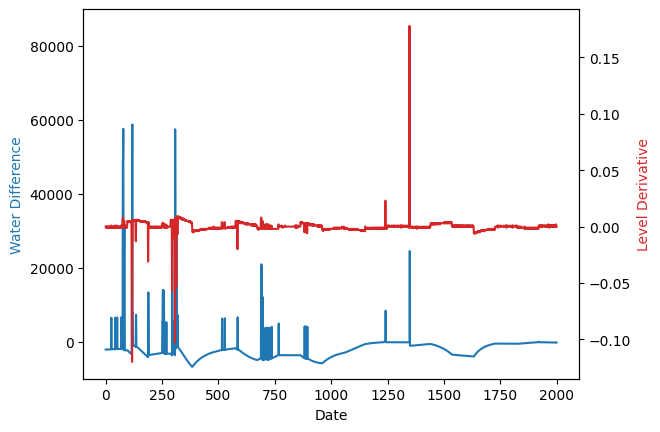

In [9]:
# Plot the water difference and the level derivative against the date with different axis scales
fig, ax1 = plt.subplots()
ax1.plot(quarter_hourly['Water Difference'].iloc[0:2000])
ax1.set_xlabel('Date')
ax1.set_ylabel('Water Difference', color='tab:blue')
ax2 = ax1.twinx()
ax2.plot(quarter_hourly['Level Difference'].iloc[0:2000], color='tab:red')
ax2.set_ylabel('Level Derivative', color='tab:red')

# Set the level derivative axis to -0.005 to 0.030
ax1.set_ylim(-10000, 90000)

plt.show()

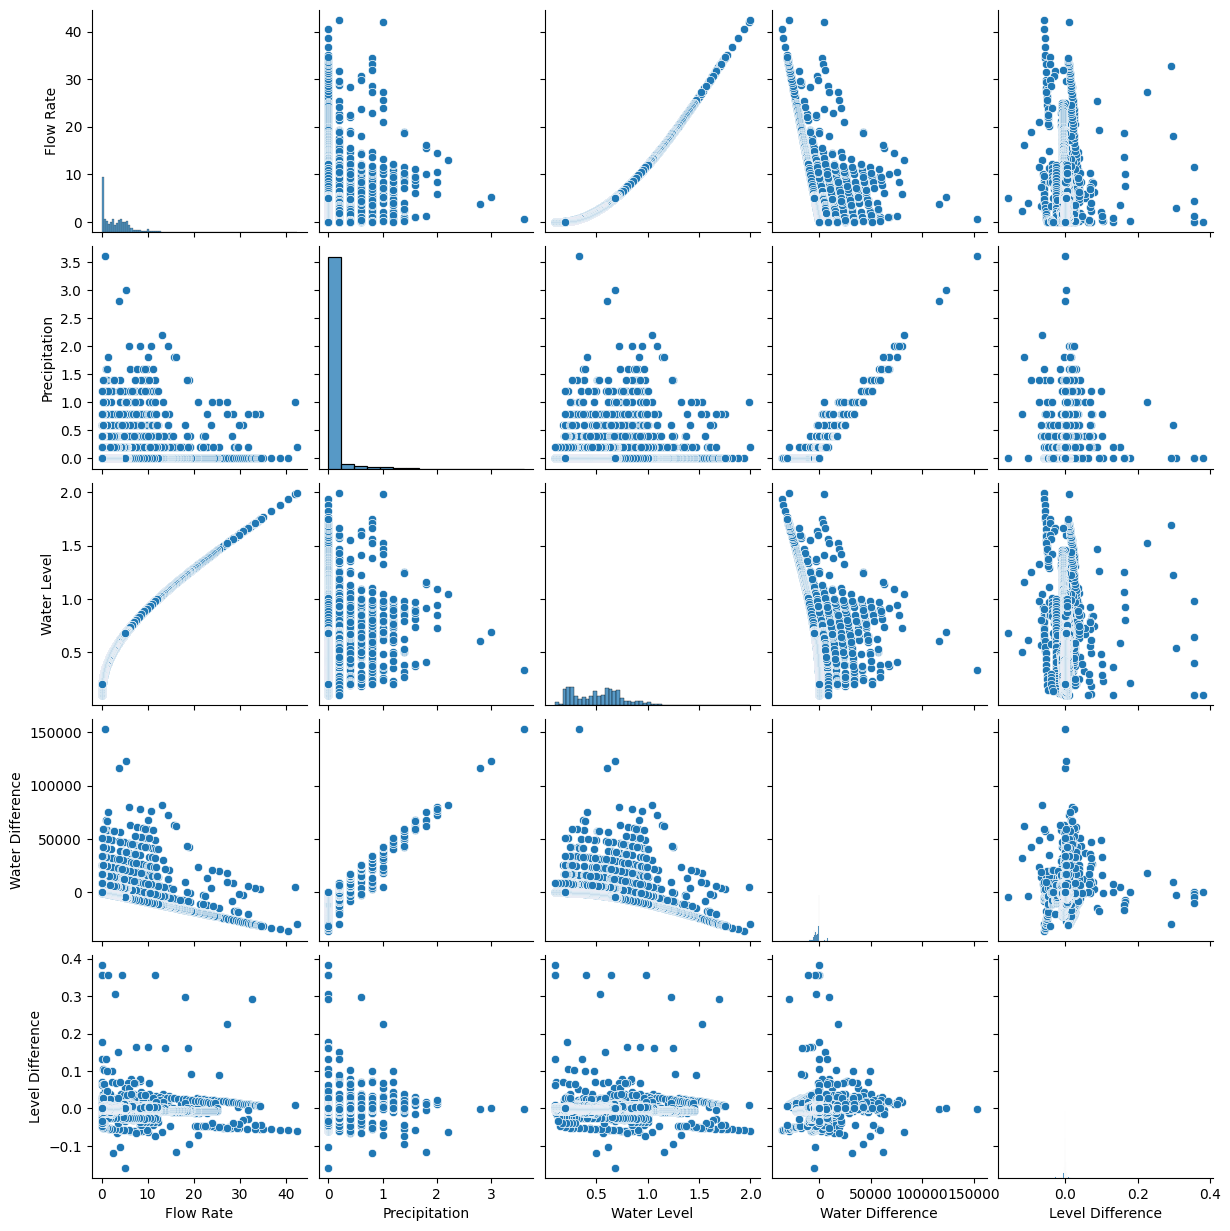

In [10]:
cols = ['Flow Rate', 'Precipitation', 'Water Level', 'Water Difference', 'Level Difference']
sns.pairplot(quarter_hourly[cols], height=2.5)

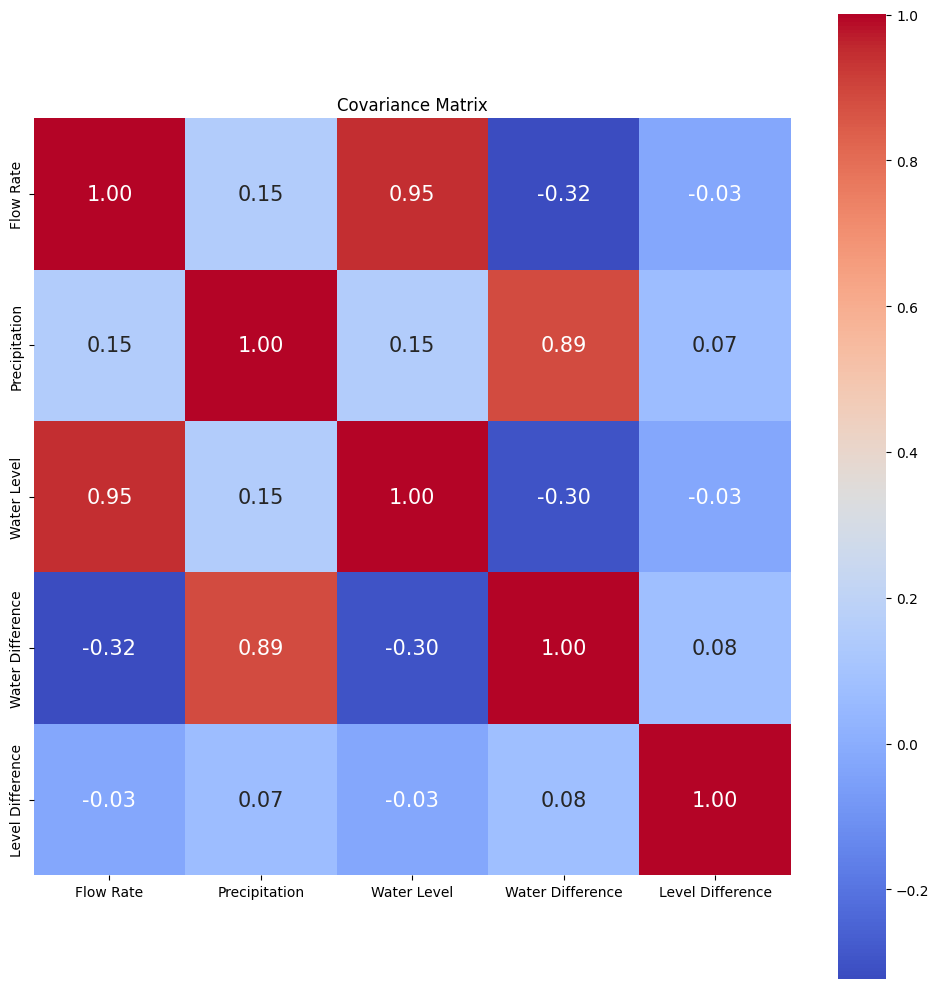

In [11]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(quarter_hourly[cols].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm', yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

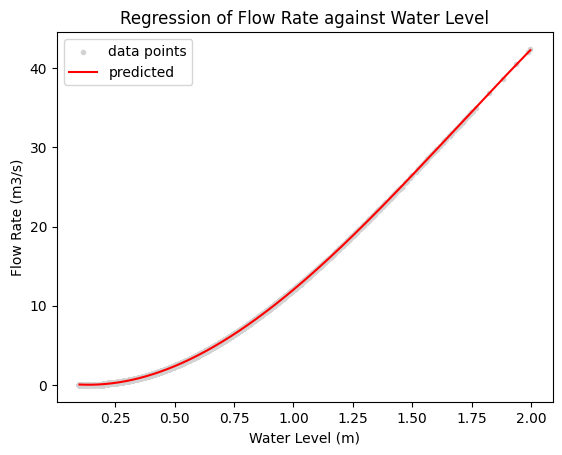

In [12]:
# Fit a polynomial curve to the data
X = quarter_hourly['Water Level'].values.reshape(-1, 1)
y = quarter_hourly['Flow Rate'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='.')

x = np.linspace(0.1, max(X), 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='predicted', color='red')

plt.legend(loc='upper left')
plt.title('Regression of Flow Rate against Water Level')
plt.xlabel('Water Level (m)')
plt.ylabel('Flow Rate (m3/s)')
plt.show()